# Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

# Get the data

In [2]:
df=pd.read_csv('datasets//Fish.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.shape

(159, 7)

In [5]:
data=df.copy()

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
print(df.isnull().sum())

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [9]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [10]:
df['Species'].value_counts(normalize=True)

Perch        0.352201
Bream        0.220126
Roach        0.125786
Pike         0.106918
Smelt        0.088050
Parkki       0.069182
Whitefish    0.037736
Name: Species, dtype: float64

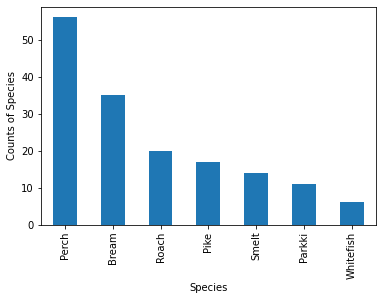

In [11]:
df['Species'].value_counts().plot.bar()
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

In [12]:
species=df['Species'].value_counts()

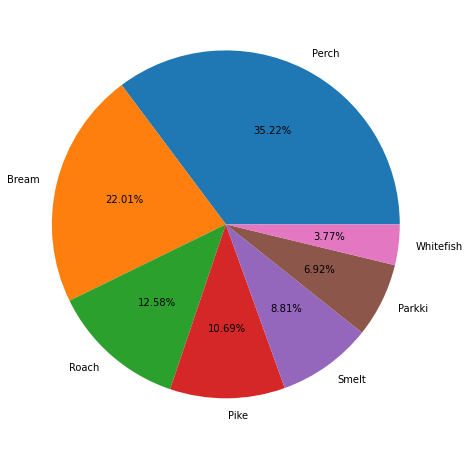

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(species.values, labels=species.index, autopct='%1.2f%%')
plt.show()

##### Correlation of the Variables

In [14]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<AxesSubplot:>

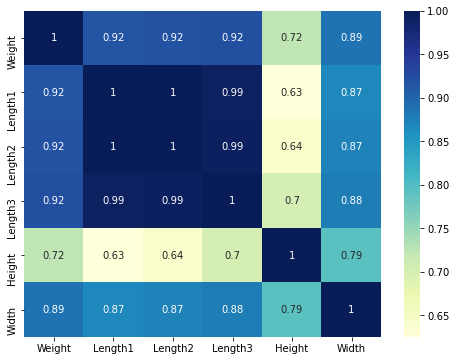

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

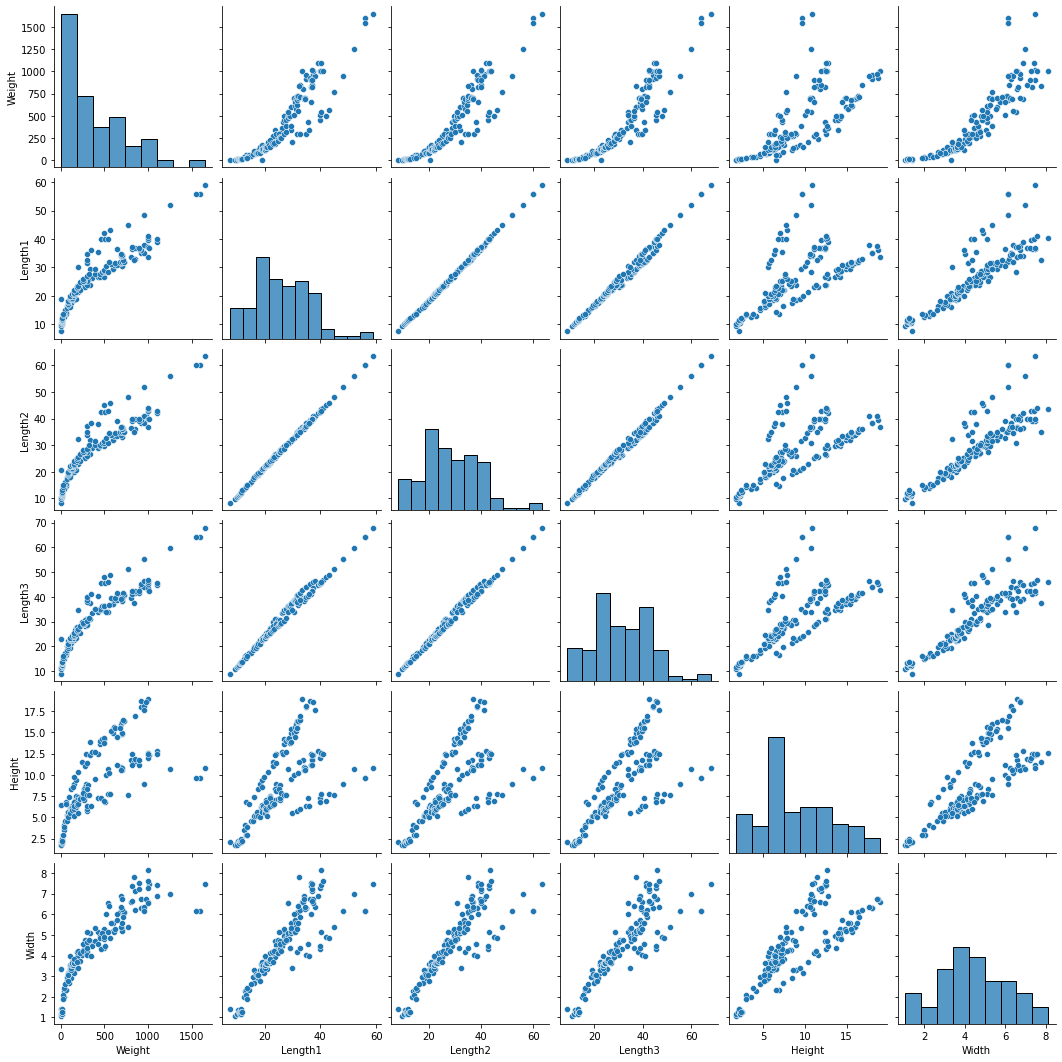

In [16]:
sns.pairplot(df, kind='scatter')

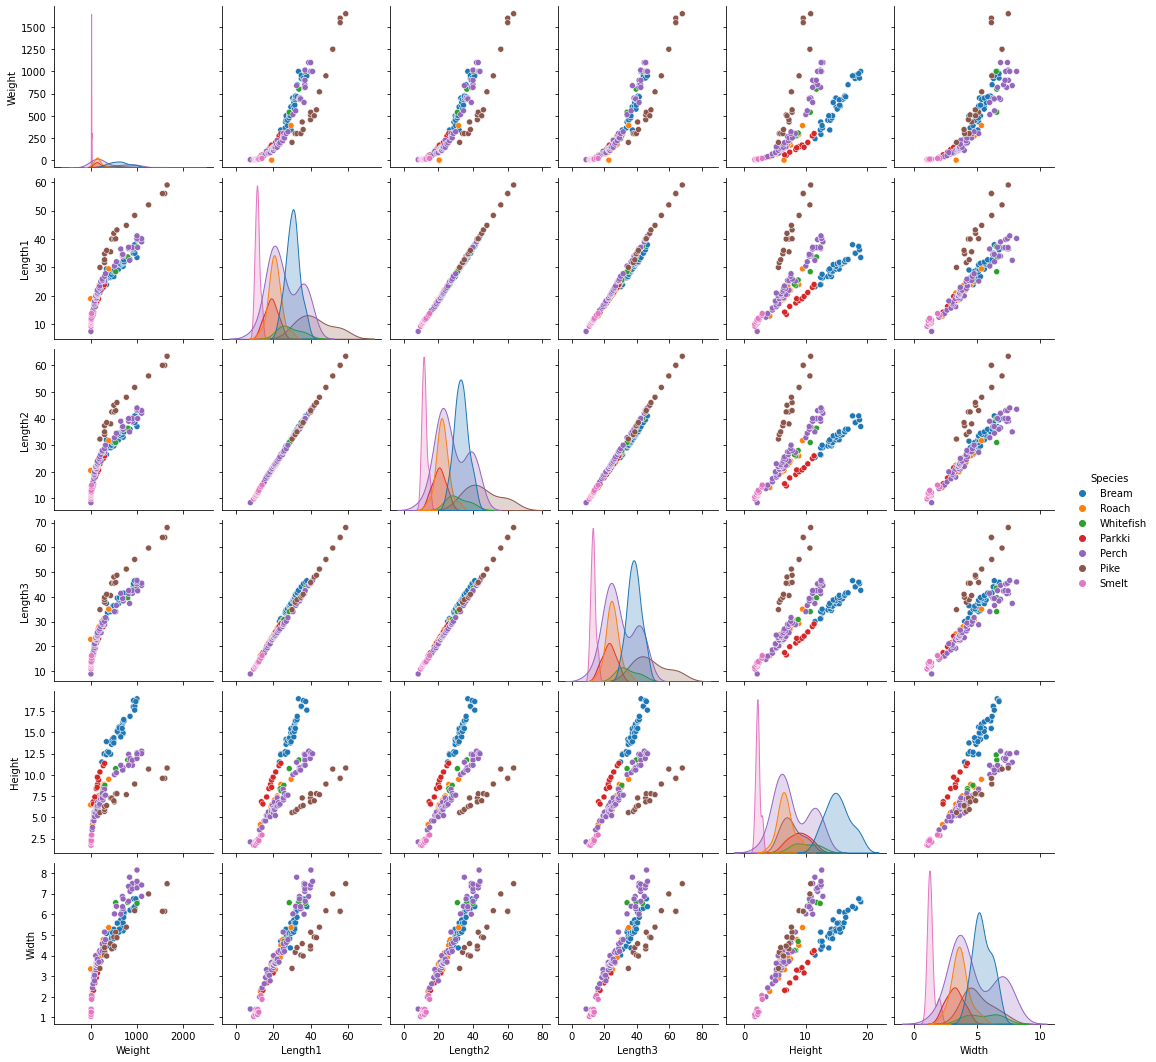

In [17]:
sns.pairplot(df, kind='scatter', hue='Species')

In [18]:
numeric_cols=df._get_numeric_data().columns

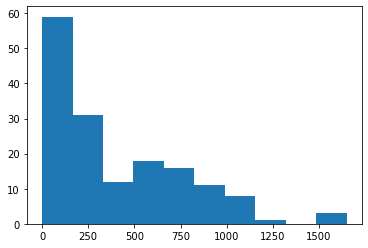

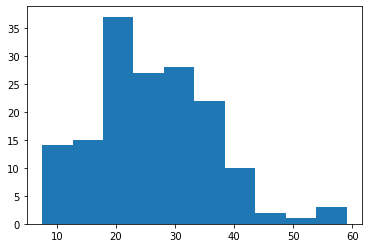

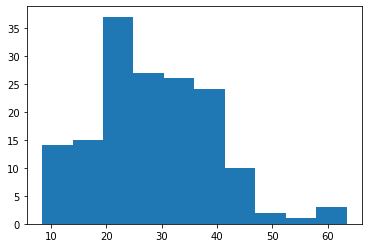

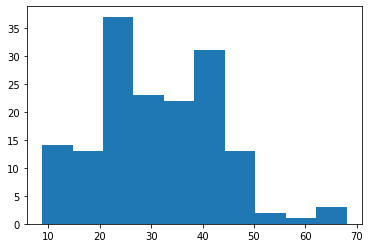

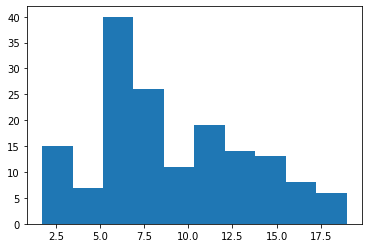

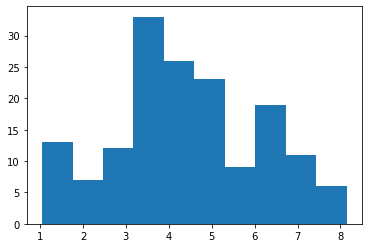

In [19]:
for col in numeric_cols:
    plt.hist(df[col])
    plt.show()

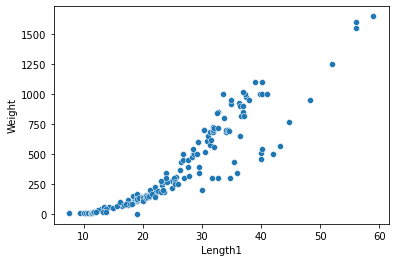

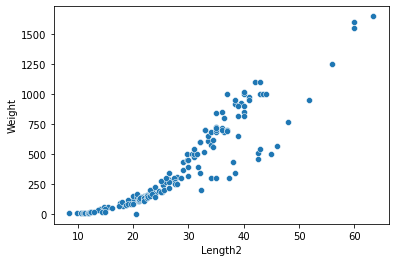

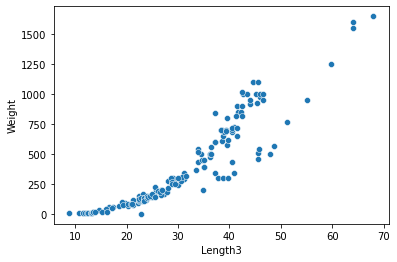

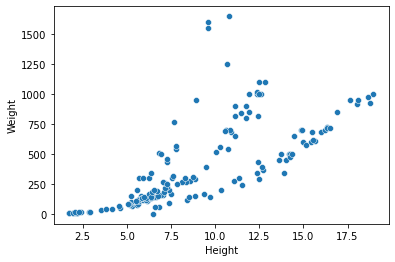

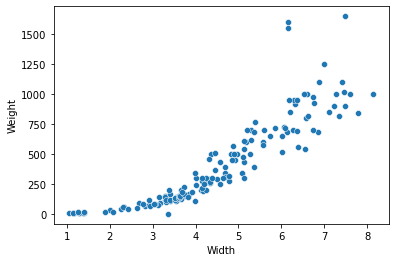

In [20]:
for col in numeric_cols:
    if col!='Weight':
        sns.scatterplot(x=col, y='Weight', data=df)
        plt.show()

<AxesSubplot:xlabel='Weight', ylabel='Density'>

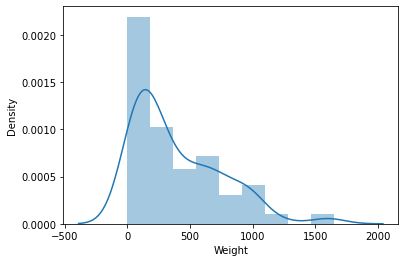

In [21]:
sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

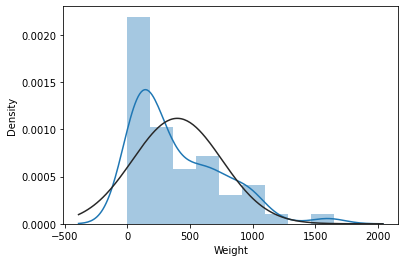

In [22]:
sns.distplot(df['Weight'], fit=norm)

##### Analysing and Dealing with Outliers

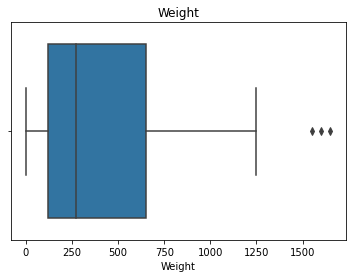

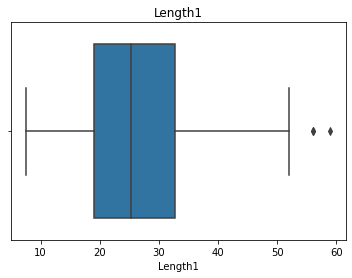

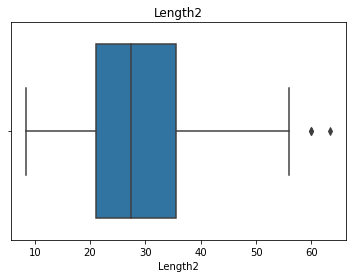

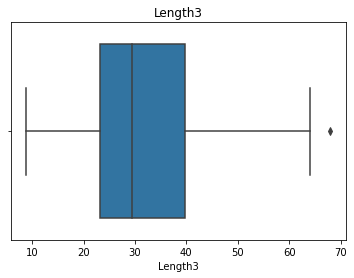

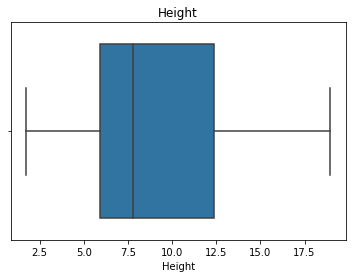

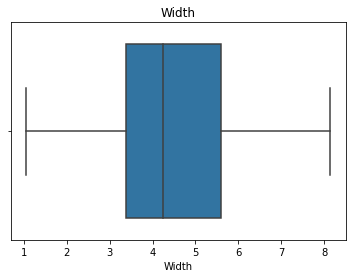

In [23]:
for col in numeric_cols:
    plt.title(col)
    sns.boxplot(df[col])
    plt.show()

In [24]:
def outliers(df, col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return df[ (df[col]<lower_bound) | (df[col]>upper_bound) ]

In [25]:
for col in numeric_cols:
    print('#'*20, col)
    print(outliers(df, col))

#################### Weight
    Species  Weight  Length1  Length2  Length3  Height  Width
142    Pike  1600.0     56.0     60.0     64.0   9.600  6.144
143    Pike  1550.0     56.0     60.0     64.0   9.600  6.144
144    Pike  1650.0     59.0     63.4     68.0  10.812  7.480
#################### Length1
    Species  Weight  Length1  Length2  Length3  Height  Width
142    Pike  1600.0     56.0     60.0     64.0   9.600  6.144
143    Pike  1550.0     56.0     60.0     64.0   9.600  6.144
144    Pike  1650.0     59.0     63.4     68.0  10.812  7.480
#################### Length2
    Species  Weight  Length1  Length2  Length3  Height  Width
142    Pike  1600.0     56.0     60.0     64.0   9.600  6.144
143    Pike  1550.0     56.0     60.0     64.0   9.600  6.144
144    Pike  1650.0     59.0     63.4     68.0  10.812  7.480
#################### Length3
    Species  Weight  Length1  Length2  Length3  Height  Width
144    Pike  1650.0     59.0     63.4     68.0  10.812   7.48
#################

##### Outliers of the Dataset

In [26]:
df.loc[142:144, :]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [27]:
df.drop([142, 143, 144], inplace=True)

In [28]:
df.shape

(156, 7)

### Encoder

In [29]:
df=pd.get_dummies(df, drop_first=True)

In [30]:
df.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


# Linear Regression

In [31]:
X=df.drop('Weight', axis=1)
Y=df['Weight']

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [33]:
lr=LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [34]:
# My model's parameters:
print('Model intercept: ', lr.intercept_)
print('Model coefficients: ', lr.coef_)

Model intercept:  -734.7631556491608
Model coefficients:  [  9.65718486  54.00566476 -50.26133807  62.84562748  45.13248367
  28.5807612  160.24600096 225.79783619 171.15730521 447.54569709
 138.99676985]


In [35]:
Y_train_pred=lr.predict(X_train)
Y_test_pred=lr.predict(X_test)

In [36]:
print(f'Train error: {r2_score(Y_train, Y_train_pred)}')
print(f'Test error: {r2_score(Y_test, Y_test_pred)}')

Train error: 0.945198566426089
Test error: 0.930054610176922


In [37]:
cross_val_score_train = cross_val_score(lr, X_train, Y_train, cv=10, scoring='r2')
print(np.mean(cross_val_score_train))

0.9195445692360913


# Overfitting in polynomial regression

In [38]:
def polynomial_regression(X, Y, degree):
    poly=PolynomialFeatures(degree=degree)
    X_poly=poly.fit_transform(X)
    X_poly=pd.DataFrame(X_poly, columns=poly.get_feature_names())
    
    X_train, X_test, Y_train, Y_test=train_test_split(X_poly, Y, random_state=42, test_size=0.30)
    
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    
    Y_train_pred=lr.predict(X_train)
    Y_test_pred=lr.predict(X_test)
    
    train_rmse=np.log1p(np.sqrt(mean_squared_error(Y_train, Y_train_pred)))
    test_rmse=np.log1p(np.sqrt(mean_squared_error(Y_test, Y_test_pred)))
    
    return float('%.2f'%train_rmse), float('%.2f'%test_rmse)

In [39]:
results={'degree':[], 'train_error':[], 'test_error':[]}

In [40]:
for i in range(1, 10):
    res=polynomial_regression(X, Y, i)
    results['degree'].append(i)
    results['train_error'].append(res[0])
    results['test_error'].append(res[1])

In [41]:
results=pd.DataFrame(results)

In [42]:
results

,degree,train_error,test_error
0,1,4.37,4.30
1,2,4.09,4.31
2,3,0.00,8.48
3,4,0.00,8.35
4,5,0.00,8.64
5,6,0.00,9.12
6,7,0.00,9.67
7,8,0.00,10.26
8,9,0.00,10.85


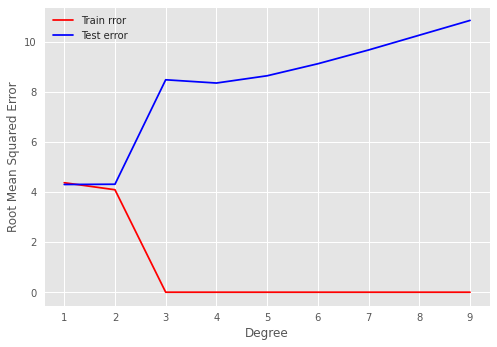

In [43]:
with plt.style.context(('seaborn', 'ggplot')):
    plt.plot(range(1, 10), results['train_error'], label='Train rror', color='red')
    plt.plot(range(1, 10), results['test_error'], label='Test error', color='blue')
    plt.xlabel('Degree')
    plt.ylabel('Root Mean Squared Error')
    plt.legend()